ALY6140 SPRING 2020

Submitted by: SIDDHARTH SAXENA

Submitted to: Prof. Daya Rudhramoorthi

Submission date: June 27, 2020

Project Title: Crime Incident Reports (Boston)


DATA DESCRIPTION:

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. 

This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields 
focused on capturing the type of incident as well as when and where it occurred. 

Some of the major attributes of the data set are offense code group, reporting area, month, day of the week, Street along with the location coordinates.

Link to the dataset: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b

BUSINESS QUESTIONS:

Crime related information can help the police identify the locations where crimes are happening the most as well as which areas require the most attention. Similarly, the local residents can also identify which are the more safer neighborhoods and also which areas can be avoided. 

1. With my project, I aim at firstly identifying the most dangerous areas / streets in Boston 

2. Next, I wish to check which are the most common types of crimes in Boston

3. I also aim at analysing and predicting which are the months in a year where the crime rate is generally high

Safety is a primary concern. Having this knowledge can help the police as well as the community leaders to educate the general public on selecting the more safer and friendly neighborhoods in the City of Boston thus helping them in keeping themselves and their kin safe.

In [170]:
#### DATA EXTRACTION ####

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [153]:
import os
os.getcwd()

'/Users/mac/Downloads'

In [147]:
#### CODE TO DOWNLOAD THE DATASET ####

import urllib.request

url = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmp695scjxo.csv'
response = urllib.request.urlopen(url)
data = response.read()
text = data.decode('utf-8')
filename = 'Crime Incident Reports.csv'
urllib.request.urlretrieve(url, filename)


('Crime Incident Reports.csv', <http.client.HTTPMessage at 0x1a23743c10>)

In [154]:
#### Reading data and storing it in a dataframe ####

data = pd.read_csv('Boston Crime Data.csv')
data.head()


INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I192055185          3301     Verbal Disputes   
1      I192055183          3006  Medical Assistance   
2      I192055182          2610               Other   
3      I192055180          2647               Other   
4      I192055177          3006  Medical Assistance   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                 VERBAL DISPUTE      C11            344      NaN   
1  SICK/INJURED/MEDICAL - PERSON       E5            739      NaN   
2                    TRESPASSING      NaN                     NaN   
3      THREATS TO DO BODILY HARM      C11            933      NaN   
4  SICK/INJURED/MEDICAL - PERSON       A1            103      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2019-07-17 21:31:00  2019      7   Wednesday    21  Part Three   
1  2019-07-17 21:08:00  2019      7   Wednesday    21  Part Three   
2  2019-07-17 21:32:00  2019      7   Wednesday    21    Part Two   
3  2019-07-17 21:12:00  2019      7   Wednesday    21    Part Two   
4  2019-07-17 20:42:00  2019      7   Wednesday    20  Part Three   

          STREET        Lat       Long                     Location  
0     GENEVA AVE  42.301351 -71.067965  (42.30135087, -71.06796465)  
1     DWINELL ST  42.289366 -71.163810  (42.28936619, -71.16381000)  
2            NaN  42.356995 -71.058738  (42.35699456, -71.05873777)  
3  WASHINGTON ST  42.284195 -71.071580  (42.28419540, -71.07157967)  
4   BROMFIELD ST  42.356721 -71.060223  (42.35672129, -71.06022279)

DATA CLEAN-UP AND EXPLORATION

In [155]:
#### To obtain a summary of the dataframe ####

data.info() 

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404368 entries, 0 to 404367
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      404368 non-null  object 
 1   OFFENSE_CODE         404368 non-null  int64  
 2   OFFENSE_CODE_GROUP   404368 non-null  object 
 3   OFFENSE_DESCRIPTION  404368 non-null  object 
 4   DISTRICT             402256 non-null  object 
 5   REPORTING_AREA       404368 non-null  object 
 6   SHOOTING             1652 non-null    object 
 7   OCCURRED_ON_DATE     404368 non-null  object 
 8   YEAR                 404368 non-null  int64  
 9   MONTH                404368 non-null  int64  
 10  DAY_OF_WEEK          404368 non-null  object 
 11  HOUR                 404368 non-null  int64  
 12  UCR_PART             404260 non-null  object 
 13  STREET               392356 non-null  object 
 14  Lat                  378852 non-null  float64
 15  Long             

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  404368.000000  404368.000000  404368.000000  404368.000000   
mean     2327.911519    2016.987346       6.566346      13.112427   
std      1181.808569       1.236130       3.343182       6.292524   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1102.000000    2016.000000       4.000000       9.000000   
50%      3001.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2018.000000       9.000000      18.000000   
max      3831.000000    2019.000000      12.000000      23.000000   

                 Lat           Long  
count  378852.000000  378852.000000  
mean       42.218307     -70.915009  
std         2.118589       3.427019  
min        -1.000000     -71.178674  
25%        42.297163     -71.097200  
50%        42.325538     -71.077610  
75%        42.348546     -71.062583  
max        42.395042      -1.000000

In [156]:
#### To check the shape of the dataframe i.e. the total no. of records in the dataframe ####

data.shape

(404368, 17)

In [157]:
data.columns.values

array(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], dtype=object)

In [160]:
#### RENAMING COLUMNS ####


data.rename(columns = {'Lat' : 'Latitude', 'Long' : 'Longitude' }, inplace = True)

data.head()


INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I192055185          3301     Verbal Disputes   
1      I192055183          3006  Medical Assistance   
2      I192055182          2610               Other   
3      I192055180          2647               Other   
4      I192055177          3006  Medical Assistance   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                 VERBAL DISPUTE      C11            344      NaN   
1  SICK/INJURED/MEDICAL - PERSON       E5            739      NaN   
2                    TRESPASSING      NaN                     NaN   
3      THREATS TO DO BODILY HARM      C11            933      NaN   
4  SICK/INJURED/MEDICAL - PERSON       A1            103      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2019-07-17 21:31:00  2019      7   Wednesday    21  Part Three   
1  2019-07-17 21:08:00  2019      7   Wednesday    21  Part Three   
2  2019-07-17 21:32:00  2019      7   Wednesday    21    Part Two   
3  2019-07-17 21:12:00  2019      7   Wednesday    21    Part Two   
4  2019-07-17 20:42:00  2019      7   Wednesday    20  Part Three   

          STREET   Latitude  Longitude                     Location  
0     GENEVA AVE  42.301351 -71.067965  (42.30135087, -71.06796465)  
1     DWINELL ST  42.289366 -71.163810  (42.28936619, -71.16381000)  
2            NaN  42.356995 -71.058738  (42.35699456, -71.05873777)  
3  WASHINGTON ST  42.284195 -71.071580  (42.28419540, -71.07157967)  
4   BROMFIELD ST  42.356721 -71.060223  (42.35672129, -71.06022279)

In [161]:
#### Checking the number of duplicate values in Street column ####

street_name = data['STREET'].value_counts()
print(street_name[street_name>1])

WASHINGTON ST     18319
BLUE HILL AVE      9994
BOYLSTON ST        9082
DORCHESTER AVE     6407
TREMONT ST         6200
                  ...  
JUNIPER TER           2
PETERBOROUGH          2
SPINNEY ST            2
FRANKLIN GDN          2
AVERY PL              2
Name: STREET, Length: 3929, dtype: int64


In [162]:
#### Removing any special characters from STREET column ####

data['STREET'] = data['STREET'].str.replace("~"," ")
data['STREET'] = data['STREET'].str.replace("$"," ")
data['STREET'] = data['STREET'].str.replace("%"," ")
data['STREET'] = data['STREET'].str.replace("*"," ")


 
  
COMPLETE EXPLORATORY DATA ANALYSIS using PANDAS PROFILING :


In [126]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [166]:
#### Generating Pandas Profiling Report ####

import pandas_profiling as pp
pp.ProfileReport(data)

ANALYSIS & DATA VISUALIZATION:

In [36]:
#### Checking which are the MOST COMMON TYPES of crimes in Boston ####

data.OFFENSE_CODE_GROUP.value_counts().iloc[:15] 
#gives us the most commonly reported crimes in the areas of Boston 

Motor Vehicle Accident Response    47090
Larceny                            32826
Medical Assistance                 30721
Investigate Person                 23682
Other                              22746
Drug Violation                     20970
Simple Assault                     20191
Vandalism                          19073
Verbal Disputes                    16823
Investigate Property               14328
Towed                              14190
Larceny From Motor Vehicle         13228
Property Lost                      12743
Warrant Arrests                    10525
Aggravated Assault                 10058
Name: OFFENSE_CODE_GROUP, dtype: int64

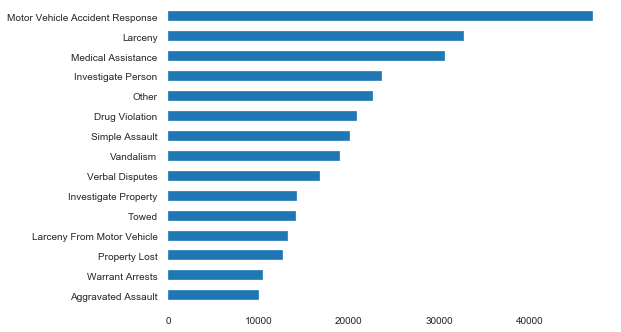

In [44]:
#### Plotting a graph to depict the most common types of crimes in Boston #### 

data.OFFENSE_CODE_GROUP.value_counts().iloc[:15].sort_values().plot(kind = "barh")

In [163]:
#### Identifying the most dangerous areas / streets in Boston ####

streets = data.groupby([data['STREET'].fillna('STREET NAME MISSING')])['REPORTING_AREA'].aggregate(np.size).reset_index().sort_values('REPORTING_AREA', 
                                                                                                                                      ascending = False).head(10)

streets

STREET  REPORTING_AREA
4561        WASHINGTON ST           18319
4180  STREET NAME MISSING           12012
510         BLUE HILL AVE            9994
577           BOYLSTON ST            9082
1354       DORCHESTER AVE            6407
4353           TREMONT ST            6200
2851    MASSACHUSETTS AVE            6011
2083         HARRISON AVE            5984
845             CENTRE ST            5612
1050     COMMONWEALTH AVE            5259

[Text(0, 0, 'WASHINGTON ST'),
 Text(0, 0, 'STREET NAME MISSING'),
 Text(0, 0, 'BLUE HILL AVE'),
 Text(0, 0, 'BOYLSTON ST'),
 Text(0, 0, 'DORCHESTER AVE'),
 Text(0, 0, 'TREMONT ST'),
 Text(0, 0, 'MASSACHUSETTS AVE'),
 Text(0, 0, 'HARRISON AVE'),
 Text(0, 0, 'CENTRE ST'),
 Text(0, 0, 'COMMONWEALTH AVE')]

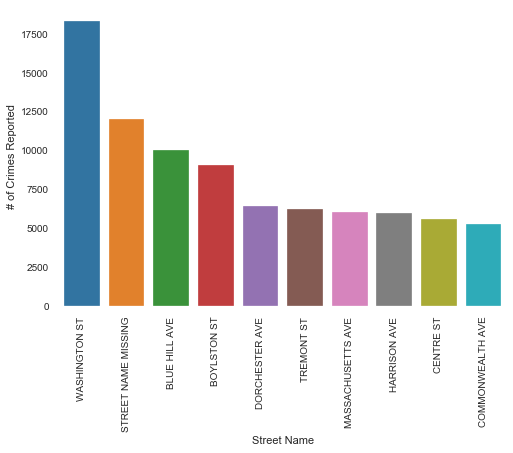

In [164]:
#### Creating a plot for the most dangerous streets / areas in Boston ####

streets_plot = sns.barplot(x = "STREET", 
                           y = "REPORTING_AREA", 
                           data = streets)

streets_plot.set(xlabel = 'Street Name', 
                 ylabel = '# of Crimes Reported')

streets_plot.set_xticklabels(streets['STREET'], rotation = 90)

Text(-6.9499999999999815, 0.5, 'Count of Crimes')

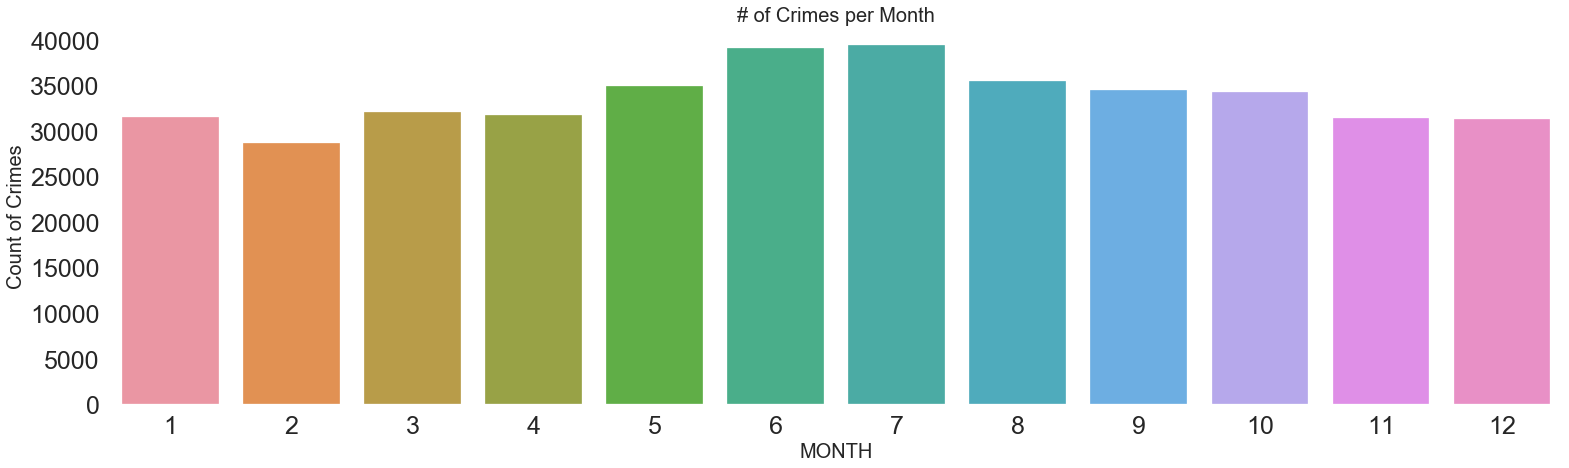

In [165]:
#### Analysing which are the most crime prone months in a year in general ####

sns.catplot(x ='MONTH',
           kind ='count',
           height = 6, 
           aspect = 3.5,
           data = data)

plt.xticks(size = 25)
plt.yticks(size = 25)
plt.title('# of Crimes per Month', fontsize = 20)
plt.xlabel('MONTH', fontsize = 20)
plt.ylabel('Count of Crimes', fontsize = 20)

ANALYSING MOTOR VEHICLE ACCIDENT RESPONSE CRIMES IN MORE DEPTH:

In [74]:

MVAR = data[data.OFFENSE_CODE_GROUP.str.contains("Motor Vehicle Accident")] #Analysing crimes related to Motor Vehicle Accident Response (MVAR)
MVAR.head()
#Fetching below the first 5 crimes related to Motor Vehicle Accident Response (MVAR)

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
13      I192055167          3831  Motor Vehicle Accident Response   
15      I192055164          3831  Motor Vehicle Accident Response   
37      I192055140          3805  Motor Vehicle Accident Response   
45      I192055128          3802  Motor Vehicle Accident Response   
52      I192055120          3803  Motor Vehicle Accident Response   

                      OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
13  M/V - LEAVING SCENE - PROPERTY DAMAGE       B2            588      NaN   
15  M/V - LEAVING SCENE - PROPERTY DAMAGE       A1            115      NaN   
37          M/V ACCIDENT - POLICE VEHICLE      C11            354      NaN   
45        M/V ACCIDENT - PROPERTY  DAMAGE      NaN                     NaN   
52         M/V ACCIDENT - PERSONAL INJURY       B2            313      NaN   

       OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
13  2019-07-17 20:22:00  2019      7   Wednesday    20  Part Three   
15  2019-07-17 19:00:00  2019      7   Wednesday    19  Part Three   
37  2019-07-17 19:29:00  2019      7   Wednesday    19  Part Three   
45  2019-07-17 17:46:00  2019      7   Wednesday    17  Part Three   
52  2019-07-17 18:06:00  2019      7   Wednesday    18  Part Three   

          STREET        Lat       Long                     Location  
13    TREMONT ST  42.331675 -71.096401  (42.33167475, -71.09640092)  
15      SOUTH ST  42.351867 -71.057204  (42.35186740, -71.05720373)  
37      ADAMS ST  42.298219 -71.057048  (42.29821908, -71.05704798)  
45           NaN  42.349199 -71.100595  (42.34919861, -71.10059508)  
52  HARRISHOF ST  42.316376 -71.086915  (42.31637566, -71.08691490)

In [75]:
MVAR.shape #to check the total number of records

(47090, 17)

In [87]:
#### Identifying the streets where MVAR related crimes occur the most ####

MVAR_street = MVAR.groupby("STREET").size().sort_values(ascending = False)
MVAR_street.head(20) 
#This gives us the TOP 20 streets in Boston where Motor Vehicle Accident related response will mostly likely be required

STREET
BLUE HILL AVE          1625
WASHINGTON ST          1479
DORCHESTER AVE         1043
CENTRE ST               779
COMMONWEALTH AVE        777
COLUMBIA RD             704
HYDE PARK AVE           683
MASSACHUSETTS AVE       667
ADAMS ST                565
AMERICAN LEGION HWY     516
COLUMBUS AVE            498
CAMBRIDGE ST            491
BOYLSTON ST             488
DUDLEY ST               455
RIVER ST                449
TREMONT ST              445
BEACON ST               427
HARRISON AVE            413
HUNTINGTON AVE          397
CUMMINS HWY             336
dtype: int64

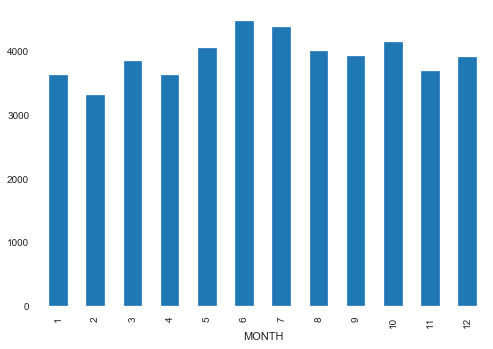

In [92]:
#### Trend depicting MVAR incident occurance per month ####

MVAR.groupby("MONTH").size().plot(kind = "bar")

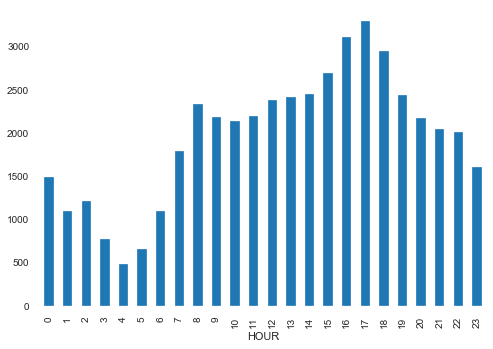

In [93]:
#### Daily trend of MVAR related crimes ####

MVAR.groupby("HOUR").size().plot(kind = "bar")

In [98]:
MVAR[MVAR.YEAR == 2017].groupby(['MONTH', 'HOUR']).size().unstack(0)

MONTH  1   2   3   4   5   6   7   8   9   10  11  12
HOUR                                                 
0      29  22  25  30  34  28  34  38  28  33  36  36
1      22  21  29  26  20  23  19  26  22  19  24  21
2      27  26  32  21  22  22  28  23  20  23  14  31
3      18  18  12  22  16  19  14  15  19  18   9  20
4      16   6  10   8  11   9   5  10  13  17   8   7
5       8  16  20  12  16   9  12  13  17  13  10  20
6      31  40  26  17  17  22  24  19  21  22  30  21
7      36  47  37  32  50  39  38  32  42  43  33  38
8      60  43  54  44  45  58  38  56  50  65  45  53
9      38  40  48  56  39  52  48  46  51  59  37  46
10     40  45  59  42  48  37  49  54  39  52  53  43
11     36  45  43  47  51  45  50  47  51  45  41  38
12     36  40  45  50  52  52  47  57  55  45  43  49
13     51  43  50  45  54  58  56  45  54  48  53  43
14     46  67  60  47  48  59  61  63  55  60  50  53
15     43  54  65  43  67  73  66  67  69  55  45  44
16     58  65  69  65  81  69  63  89  81  80  65  83
17     78  65  66  66  76  97  72  80  74  76  67  67
18     52  50  64  59  61  57  59  43  75  64  79  53
19     56  52  49  56  48  57  61  52  55  51  59  43
20     42  37  53  45  44  51  46  36  54  58  30  47
21     34  38  49  53  50  55  45  44  32  38  31  48
22     35  43  47  55  36  49  44  50  37  48  34  43
23     30  27  34  46  31  31  32  31  26  34  30  34

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a42dca4d0>,
      dtype=object)

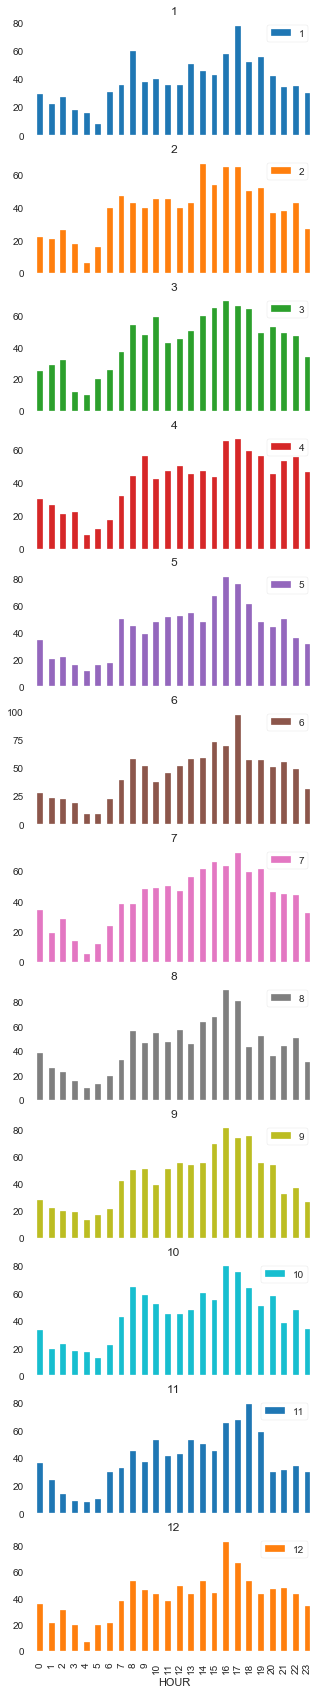

In [102]:
MVAR[MVAR.YEAR == 2017].groupby(['MONTH', 'HOUR']).size().unstack(0).plot(subplots = True, kind = "bar", figsize = (5, 30))

#The below plots help us track the total number of MVAR related incidents occuring during each hour of a month in the year 2017 in the City of Boston

PREDICTIVE ANALYTICS:

In [167]:
x = data.drop(['Location'], axis = 1)  

In [169]:
y = data['Location']

In [173]:
xtrn, xtst, ytrn, ytst = train_test_split (x, y, test_size = 0.25, random_state = 0)

In [176]:
#### Logistic Regression ####

logreg = LogisticRegression()
logreg.fit(xtrn, ytrn)
ypred_logreg = lg.predict(xtst)

 CONCLUSION:

1.  From this project, I have successfully identified the "MOST DANGEROUS STREETS" in Boston based on the Crime Incidents Reports data. Below I am enlisting the TOP 5 streets where crimes are most likely to occur: 

        i.   WASHINGTON ST.
        ii.  BLUE HILL AVE
        iii. BOYLSTON ST. 
        iv.  DORCHESTER AVE
        v.   TREMONT ST.

Whereas there are 907 streets in Boston where there has been either 1 or less than 1 crime based on the data. These areas / streets can be considered to be the MOST SAFEST AREAS in the City of Boston. Some of them I am listing below:
    
        i.   HILLSIDE ST.
        ii.  ALLANDALE
        iii. CUMSTON 
        iv.  PALMER

2. Based on the bar graph that I computed, I can conclude that the TOP 3 crime incidents which happened the most frequently in Boston are :

        i.   MOTOR VEHICLE ACCIDENT RESPONSE
        ii.  LARCENY
        iii. MEDICAL ASSISTANCE
        
The causes for this could be either poverty, substance abuse and inadequate security perhaps. 


3. Lastly, with my project, I have been able to identify those months in which the crime rates are higher as compared to the other months in a year. The top 3 months in which maximum crime occur are:


        i.   JULY
        ii.  JUNE
        iii. AUGUST
        
I think this has to have a direct correlation with the weather. Based on my analysis, the crime rates drop during the peak winter months i.e. January and February whereas the crime rates are quite high during the summer and Fall period when the temperatures are comparitively high and weather is good. 


4. In addition to the business objectives I had set out to seek answers to, I wanted to analyse a specific crime in more detail. Thus, I took up the most occured crime in Boston i.e. Motor Vehicle Accident Response (MVAR) crime and performed further analysis on the same. 

Based on my analysis, I found out that the MVAR crime occured most frequently in the area of BLUE HILL AVE and especially during the evening time i.e. aroud 5PM. 
This could be largely due to the fact that at that time i.e. between 4PM to 6PM, a significantly large number of people are on their way back home majorly from work in their vehicles.

Also, the MVAR related crimes occur majorly in the Months of June, July and August when the weather is much clearer and the roads are not covered in snow.



**** 

With all this knowledge combined, the police can be better prepared to avert crimes before they have even occurred as they now know a trend which indicates the type of crime, the day of crime as well as the most likely time in the day the crime could occur. Thus, the police can be better postioned to deal with such types of crime and thus significantly reduce the rate of crimes in the city of Boston. These insights can also help overseas students and even locals to take more informed decisions while finalising an apartment as they can select neighborhoods that are safer and friendly thus completely avoiding dangerous areas in the process.

